In [1]:
import torch
from transformers import BertTokenizer, BertModel#, BertForMaskedLM
import numpy as np
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# model
model = BertModel.from_pretrained('bert-base-uncased')

#input_string = "The bank robber stopped by the bank. The bank happened to be along the sea bank"
input_string = text6.generate()
encoded_string = tokenizer.encode(input_string)
encoded_vector = torch.tensor(encoded_string)

#input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute")).unsqueeze(0)  # Batch size 1
input_ids = encoded_vector.unsqueeze(0) # arraysize 1 for 1 string

# run model on input
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

Building ngram index...


Saint Aauuuves in Cornwall ? ' s all ! ARTHUR : How can we come up and
have a plan , sir . rodent you ever set eyes on . Hello . Do they
listen to me ! , great . Ninepence . who , when he seemed about to
recover , suddenly felt the icy hand of death upon him . No SCENE 19 :
ARTHUR : Walk away . squeak ] [ howl ] [ creak ] CROWD : Tell us ! -
wom ! utterly disheartened King Arthur music stops ] BLACK KNIGHT ' s
your next


In [3]:
len(tokenizer.vocab)

30522

In [4]:
print(f'input_string: {input_string}')
print()
print(f'{np.shape(encoded_string)} encoded_string: {encoded_string}')
print()
print(f'{encoded_vector.size()} encoded_vector: {encoded_vector}')
print()
print(f'{input_ids.size()} input_ids: {input_ids}')
print()
#print(f'({outputs[0].size()}, {outputs[1].size()})outputs: {outputs}')
print()

print('Tokens:')
tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze())
print(tokens)

print('Embeddings:')
embeddings = outputs[0].squeeze()
print(embeddings)

#print('Tokens -> Embeddings Pair')
#for word, vec in zip(tokens, embeddings):
#    print(word, vec.detach().numpy()[:5])


# locate occurances of bank
indices = [i for i, token in enumerate(tokens) if token == "bank"]
print(f'index locations of "bank": {indices}')

input_string: Saint Aauuuves in Cornwall ? ' s all ! ARTHUR : How can we come up and
have a plan , sir . rodent you ever set eyes on . Hello . Do they
listen to me ! , great . Ninepence . who , when he seemed about to
recover , suddenly felt the icy hand of death upon him . No SCENE 19 :
ARTHUR : Walk away . squeak ] [ howl ] [ creak ] CROWD : Tell us ! -
wom ! utterly disheartened King Arthur music stops ] BLACK KNIGHT ' s
your next

(114,) encoded_string: [101, 3002, 9779, 2226, 2226, 22909, 2015, 1999, 10387, 1029, 1005, 1055, 2035, 999, 4300, 1024, 2129, 2064, 2057, 2272, 2039, 1998, 2031, 1037, 2933, 1010, 2909, 1012, 8469, 3372, 2017, 2412, 2275, 2159, 2006, 1012, 7592, 1012, 2079, 2027, 4952, 2000, 2033, 999, 1010, 2307, 1012, 3157, 11837, 3401, 1012, 2040, 1010, 2043, 2002, 2790, 2055, 2000, 8980, 1010, 3402, 2371, 1996, 13580, 2192, 1997, 2331, 2588, 2032, 1012, 2053, 3496, 2539, 1024, 4300, 1024, 3328, 2185, 1012, 29552, 1033, 1031, 22912, 1033, 1031, 13675, 25508, 1033, 4306

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd

In [6]:
# vector embeddings of each token
vec_embeddings = embeddings.detach().numpy()

# color for each token for visuals
token_color = [np.random.rand(3,) for _ in range(len(tokens))]

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vec_embeddings)
print(np.shape(pca_result))

(114, 2)


In [15]:
df = pd.DataFrame(pca_result, columns=['pca_0', 'pca_1'], index=tokens)
display(df)

,pca_0,pca_1
[CLS],-2.663856,-0.255710
saint,-1.911796,-2.414978
aa,-1.261627,-2.860217
##u,-1.741136,-3.120413
##u,-1.408004,-3.151086
...,...,...
',-0.201641,-0.925590
s,-1.841284,-0.020334
your,-1.115368,-0.228135
next,-2.313562,-0.241548


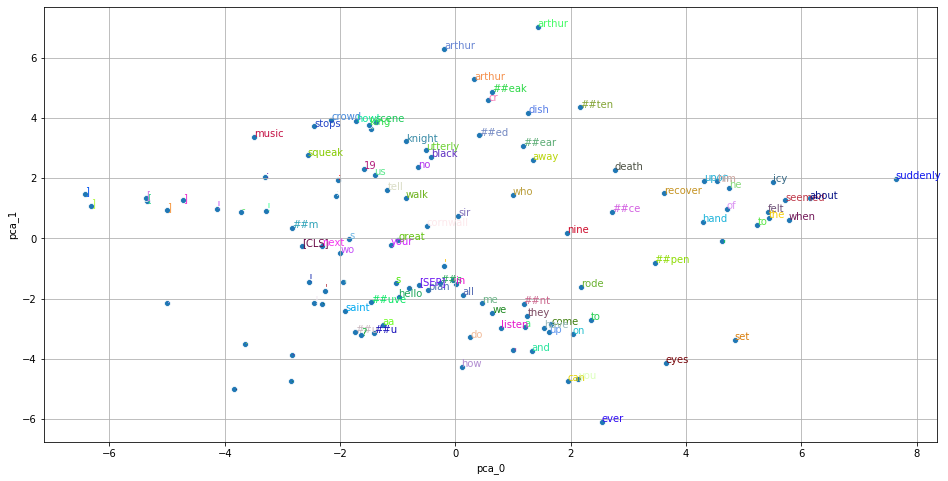

In [16]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x='pca_0', y='pca_1',
    data=df,
    legend='full'
)
plt.grid()

ax = plt.gca()
for (k, v), color in zip(df.iterrows(), token_color):
    ax.annotate(k, v, c=color)

#for idx, (token, color) in enumerate(zip(tokens, token_color)):
#    plt.text(-7 + idx*1, -10, token, fontsize='medium', color=color)

In [10]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vec_embeddings)
print(np.shape(tsne_results))

(114, 2)


In [11]:
df = pd.DataFrame(tsne_results, columns=['tsne_0', 'tsne_1'], index=tokens)
display(df)

,tsne_0,tsne_1
[CLS],11.908307,7.786438
saint,-4.098339,-4.440689
aa,8.734057,9.431974
##u,8.606112,7.671785
##u,-4.926160,-6.264917
...,...,...
',11.212424,3.664652
s,10.934986,2.631830
your,-1.995633,4.748827
next,5.519942,-3.522573


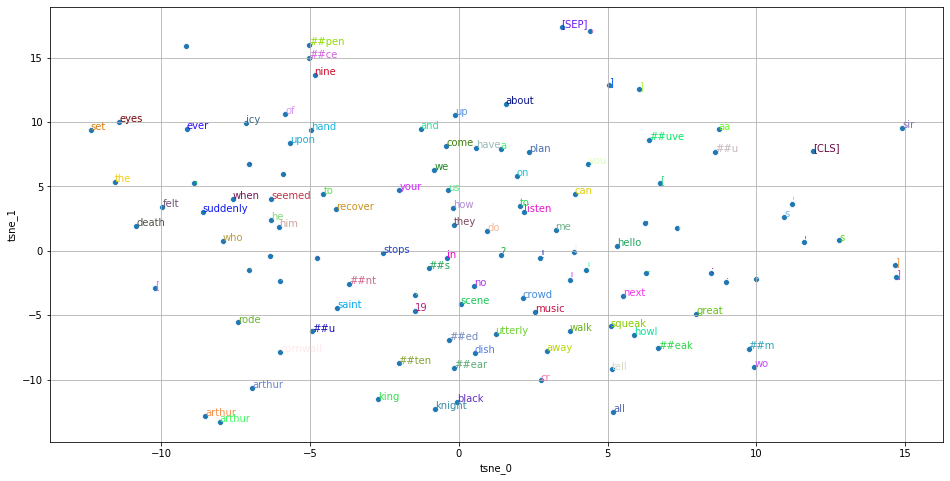

In [13]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne_0", y="tsne_1",
    data=df,
    legend="full"
)
plt.grid()

ax = plt.gca()
for (k, v), color in zip(df.iterrows(), token_color):
    ax.annotate(k, v, c=color)

#for idx, (token, color) in enumerate(zip(tokens, token_color)):
#    plt.text(-400 + idx*50, -400, token, fontsize='medium', color=color)